In [2]:
from databaseCommunication import readDatabaseFile, createDataFrame_list
from dataframeFormating import createLabeledDataFrame_list #, N_polarized_pure3b, N_polarized, N_linear, getReducedDataframe, getReducedResults, 
from calculation import trapFrequency, getSubDF, noiseFilter, renameUnits, dropExcluded, computeBareTrapFrequencies, computeTrapFrequencies
from fit import fitDF, N_polarized_pure3b, N_polarized, N_linear
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from parameters import *

In [201]:
label_heads = ['experiment', "ODTFactor"]


labels_inSitu = [[['inSitu', 4], [162251, 162350]],
                 [['inSitu', 4], [162352, 162407]],
                 [['inSitu', 4], [162414, 162469]]
                ]   # June 10th

#labels_TOF = [[['TOF', 4], [162881, 162980]],
#              [['TOF', 4], [163041, 163289]]
#                ]# June 10th

#labels_TOF = [[['TOF', 4], [163041, 163289]]
#                ]

labels_TOF = [[['TOF', 4], [163301, 163440]],
              [['TOF', 4], [163448, 163615]],
              [['TOF', 4], [163621, 163844]]
                ]

# 1 GHz
# 5 GHz
# 20 GHz


labels = [] 

excluded = []

df_TOF = createLabeledDataFrame_list(labels_TOF, label_heads, ciceroVariables, fitVariables)
for column in df_TOF.columns:
    try:
        df_TOF[column] = df_TOF[column].astype(float)
    except:
        pass

In [202]:
ciceroVariables = ['BECHoldTime', 'TOF', 'latticeDepth_final', 'latticeDetuning', 'compz_rotation', 'ODT3_Comp_final', 'dummy']
fitVariables = ['nCount', 'xWidth', 'yWidth', 'xPos', 'yPos']

df_TOF = createLabeledDataFrame_list(labels_TOF, label_heads, ciceroVariables, fitVariables)
for column in df_TOF.columns:
    try:
        df_TOF[column] = df_TOF[column].astype(float)
    except:
        pass
df_TOF.to_pickle('data_save_210610.pickle')        

"""df_inSitu = createLabeledDataFrame_list(labels_inSitu, label_heads, ciceroVariables, fitVariables)
for column in df_inSitu.columns:
    try:
        df_inSitu[column] = df_inSitu[column].astype(float)
    except:
        pass

df_inSitu.to_pickle('data_save_210610_inSitu.pickle')"""

"df_inSitu = createLabeledDataFrame_list(labels_inSitu, label_heads, ciceroVariables, fitVariables)\nfor column in df_inSitu.columns:\n    try:\n        df_inSitu[column] = df_inSitu[column].astype(float)\n    except:\n        pass\n\ndf_inSitu.to_pickle('data_save_210610_inSitu.pickle')"

In [203]:
df_TOF.iloc[:-20,:15]

,BECHoldTime,TOF,latticeDepth_final,latticeDetuning,compz_rotation,ODT3_Comp_final,dummy,nCount,xWidth,yWidth,xPos,yPos,imageID,experiment,ODTFactor
0,5.0,4.0,20.0,-1.0,7.72,0.38,1.0,3230.0,28.60870,10.46590,1231.55,995.304,163301.0,TOF,4.0
1,5.0,4.0,0.2,-1.0,7.72,0.38,2.0,29260.0,13.28090,13.53900,1231.55,1002.010,163302.0,TOF,4.0
2,1.0,4.0,20.0,-1.0,7.72,0.38,1.0,6962.0,43.33880,12.31040,1227.77,1010.030,163303.0,TOF,4.0
3,20.0,4.0,20.0,-1.0,7.40,0.38,2.0,10233.0,5.87819,4.79507,1232.31,1007.750,163304.0,TOF,4.0
4,2.0,4.0,1.0,-1.0,7.72,0.38,1.0,29191.0,17.54090,14.80730,1231.91,1000.000,163305.0,TOF,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,30.0,4.0,60.0,-5.0,7.72,0.38,2.0,3374.0,58.36210,27.81850,1239.65,991.284,163820.0,TOF,4.0
508,5.0,4.0,60.0,-5.0,7.40,0.38,1.0,21907.0,34.68700,29.64480,1231.78,1002.600,163821.0,TOF,4.0
509,1.0,4.0,20.0,-5.0,7.72,0.38,2.0,28452.0,23.78130,20.55610,1231.20,999.312,163822.0,TOF,4.0
510,20.0,4.0,20.0,-5.0,7.40,0.38,2.0,21746.0,25.72440,25.69050,1231.08,998.992,163823.0,TOF,4.0


In [204]:
df_TOF = pd.read_pickle('data_save_210610.pickle')
#df_inSitu = pd.read_pickle('data_save_210604_inSitu.pickle')
df_inSitu = pd.read_pickle('data_save_210610_inSitu.pickle')

#### Noise filtering
#df_TOF = noiseFilter(df_TOF, nMax = np.inf, nMin = 4000, xWidthMax = np.inf, yWidthMax = 100)
#df_TOF =  noiseFilter(df_TOF, nMax = np.inf, nMin = 4000, xWidthMax = 100, xWidthMin = 4,  yWidthMax = 100, yWidthMin = 4)

#df_TOF =  noiseFilter(df_TOF, nMax = np.inf, nMin = 3000, xWidthMax = 100, xWidthMin = 3,  yWidthMax = 100, yWidthMin = 3)

# add units and renames columns
# it add xWidth_um and the inversion between X and Y is performed
renameUnits(df_TOF, magnification = 4.38, cameraPixelSize = 6.5, axis = 'horizontal', experiment = 'TOF')
renameUnits(df_inSitu, magnification = 6.66, cameraPixelSize = 6.5, axis = 'vertical', experiment = 'inSitu')

# Delete these row indexes from dataFrame
dropExcluded(df_TOF, excluded)
dropExcluded(df_inSitu, excluded)

#wrongDetuningNames = pd.Index(np.where(df_inSitu['imageID'].isin(list(range(155465, 155534+1))))[0])
#df_inSitu.iloc[wrongDetuningNames, 3] = 20


In [205]:
computeBareTrapFrequencies(df_TOF, trapFrequency_x, trapFrequency_y, trapFrequency_z, trapFrequency_x_blue, trapFrequency_y_blue)
computeBareTrapFrequencies(df_inSitu, trapFrequency_x, trapFrequency_y, trapFrequency_z, trapFrequency_x_blue, trapFrequency_y_blue)

computeTrapFrequencies(df_TOF)
computeTrapFrequencies(df_inSitu)

temperature = 10*nK
df_inSitu['rWidth_inSitu_v_um'] = np.sqrt(df_inSitu['xWidth_inSitu_v_um']*df_inSitu['yWidth_inSitu_v_um'])
df_inSitu['rWidth_calculated_um'] = np.sqrt(k_B*temperature/(m*df_inSitu['trapFrequencyX_Hz']*df_inSitu['trapFrequencyY_Hz']))/um

/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


I computed that for a blue lattice $\omega_\perp^2 = \frac{\hbar k\sqrt{2V_{741}}}{m^{3/2}w_{741}^2} = \frac{\hbar k\sqrt{2\frac{m\omega_z^2}{2k^2}}}{m^{3/2}w_{741}^2} = \frac{\hbar\omega_z}{m w_{741}^2}$.

In [206]:
df_TOF.columns

Index(['BECHoldTime', 'TOF', 'latticeDepth_mW', 'latticeDetuning_GHz', 'compz',
       'ODT3_Comp_final', 'dummy', 'nCount', 'xWidth', 'yWidth', 'xPos',
       'yPos', 'imageID', 'experiment', 'ODTFactor', 'xWidth_TOF_h_um',
       'zWidth_TOF_h_um', 'trapFrequencyZ_kHz', 'deconfiningTrapFrequency_Hz',
       'bareTrapFrequencyX_Hz', 'bareTrapFrequencyY_Hz', 'trapFrequencyX_Hz',
       'trapFrequencyY_Hz'],
      dtype='object')

In [207]:
latticeDepthList = np.sort(df_inSitu['latticeDepth_mW'].unique())
BECHoldTimeList = np.sort(df_inSitu['BECHoldTime'].unique())
latticeDetuningList = np.sort(df_inSitu['latticeDetuning_GHz'].unique())
compzList = np.sort(df_inSitu['compz'].unique())
ODTFactorList = np.sort(df_inSitu['ODTFactor'].unique())
ODT3_Comp_finalList = np.sort(df_inSitu['ODT3_Comp_final'].unique())
trapFrequencyList = np.sort(df_inSitu['trapFrequencyZ_kHz'].unique())


"""latticeDepthList = np.sort(df['latticeDepth'].unique())
BECHoldTimeList = np.sort(df['BECHoldTime'].unique())
latticeDetuningList = np.sort(df['latticeDetuning'].unique())
compzList = np.sort(df['compz'].unique())
ODTFactorList = np.sort(df['ODTFactor'].unique())"""
colors = ['red', 'blue', 'orange', 'black', 'green', 'pink', 'purple']

In [208]:
latticeDepthList

array([  0.2,   0.5,   1. ,   5. ,  20. ,  60. , 120. ])

In [209]:
holdTime = 0
latticeDetuning = 1
df_hold = df_inSitu[df_inSitu['BECHoldTime'] == holdTime]
df_hold = df_hold[df_hold['latticeDetuning_GHz'] == latticeDetuning]

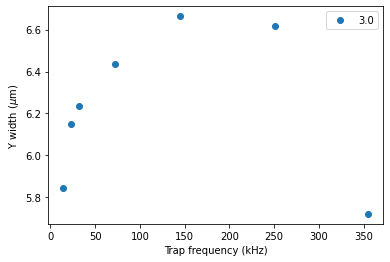

In [210]:
plt.figure()
for ODT3_Comp_final in ODT3_Comp_finalList:
    df_temp = df_hold[df_hold['ODT3_Comp_final'] == ODT3_Comp_final].groupby(['latticeDepth_mW']).mean()
    plt.plot(df_temp['trapFrequencyZ_kHz'], df_temp['yWidth_inSitu_v_um'], 'o', label = ODT3_Comp_final)
    #plt.plot(df_temp['trapFrequency'], df_temp['yWidth'], 'x', label = ODT3_Comp_final)
plt.xlabel("Trap frequency (kHz)")
plt.ylabel(r'Y width ($\mu$m)')
#plt.ylim(0,7)
plt.legend()
plt.show()

In [211]:
holdTime = 0
latticeDetuning = 20
df_hold = df_inSitu[df_inSitu['BECHoldTime'] == holdTime]

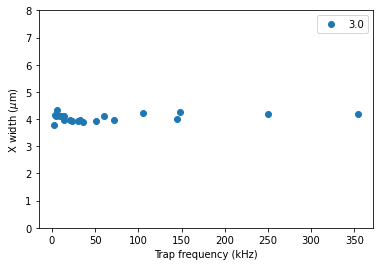

In [212]:
plt.figure()
for ODT3_Comp_final in ODT3_Comp_finalList:
    df_temp = df_hold[df_hold['ODT3_Comp_final'] == ODT3_Comp_final].groupby(['trapFrequencyZ_kHz']).mean().reset_index()
    plt.plot(df_temp['trapFrequencyZ_kHz'], df_temp['xWidth_inSitu_v_um'], 'o', label = ODT3_Comp_final)
    #plt.plot(df_temp['trapFrequency'], df_temp['yWidth'], 'x', label = ODT3_Comp_final)
plt.xlabel("Trap frequency (kHz)")
plt.ylabel(r'X width ($\mu$m)')
plt.ylim(0,8)
plt.legend()
plt.show()

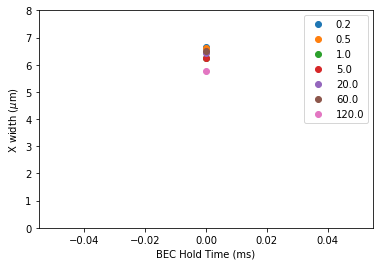

In [213]:
latticeDetuning = 5
ODT3_Comp_final = 3
plt.figure()
for latticeDepth in latticeDepthList:
    df_temp = getSubDF(df_inSitu, ['ODT3_Comp_final', 'latticeDetuning_GHz'], [ODT3_Comp_final, latticeDetuning])
    df_temp = df_temp[df_temp['latticeDepth_mW'] == latticeDepth].groupby(['trapFrequencyZ_kHz', 'BECHoldTime']).mean().reset_index()
    plt.plot(df_temp['BECHoldTime'], df_temp['yWidth_inSitu_v_um'], 'o', label = latticeDepth)
    #plt.plot(df_temp['trapFrequency'], df_temp['yWidth'], 'x', label = ODT3_Comp_final)
plt.ylabel(r'X width ($\mu$m)')
plt.xlabel(r'BEC Hold Time (ms)')
plt.ylim(0,8)
plt.legend()
plt.show()

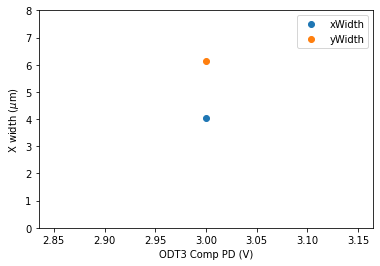

In [214]:
df_temp = df_inSitu.copy()
df_temp = df_temp.groupby(['ODT3_Comp_final']).mean().reset_index()

plt.figure()
plt.plot(df_temp['ODT3_Comp_final'], df_temp['xWidth_inSitu_v_um'], 'o', label = 'xWidth')
plt.plot(df_temp['ODT3_Comp_final'], df_temp['yWidth_inSitu_v_um'], 'o', label = 'yWidth')
plt.xlabel("ODT3 Comp PD (V)")
plt.ylabel(r'X width ($\mu$m)')
plt.legend()
plt.ylim(0,8)
plt.show()

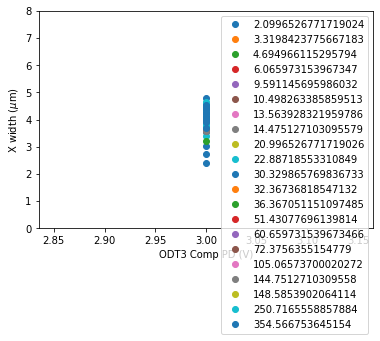

In [215]:
plt.figure()
for trapFrequency in trapFrequencyList:
    df_temp = getSubDF(df_inSitu, ['trapFrequencyZ_kHz'], [trapFrequency])
    df_temp.groupby(['dummy']).mean().reset_index()
    plt.plot(df_temp['ODT3_Comp_final'], df_temp['xWidth_inSitu_v_um'], 'o', label = trapFrequency)
    #plt.plot(df_temp['trapFrequency'], df_temp['yWidth'], 'x', label = ODT3_Comp_final)
plt.xlabel("ODT3 Comp PD (V)")
plt.ylabel(r'X width ($\mu$m)')
plt.ylim(0,8)
plt.legend()
plt.show()

<ipython-input-216-e1873cc93b64>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, Z, vmin = 2, vmax = Z.mean()*1.2)


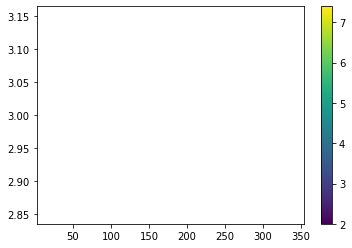

In [216]:
holdTime = 0
df_hold = getSubDF(df_inSitu, ['BECHoldTime'], [holdTime])
df_hold_color = df_hold.sort_values(['trapFrequencyZ_kHz', 'ODT3_Comp_final']).groupby(['trapFrequencyZ_kHz', 'ODT3_Comp_final']).mean()
x = np.array(trapFrequencyList)
y = np.array(ODT3_Comp_finalList)
z = np.array(df_hold_color['yWidth_inSitu_v_um'])

X, Y = np.meshgrid(x, y)
Z = z.reshape(len(y), len(x))

plt.pcolor(X, Y, Z, vmin = 2, vmax = Z.mean()*1.2)
plt.colorbar()
plt.show()

<ipython-input-217-de5b627e6a27>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, Z, vmin = 2, vmax = Z.mean()*1.2)


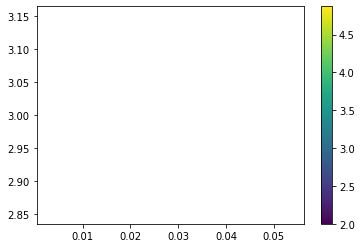

In [217]:
holdTime = 0
df_hold = df_inSitu[df_inSitu['BECHoldTime'] == holdTime]
df_hold_color = df_hold.sort_values(['trapFrequencyZ_kHz', 'ODT3_Comp_final']).groupby(['trapFrequencyZ_kHz', 'ODT3_Comp_final']).mean()
x = np.array(trapFrequencyList)/(2*np.pi*10**3)
y = np.array(ODT3_Comp_finalList)
z = np.array(df_hold_color['xWidth_inSitu_v_um'])

X, Y = np.meshgrid(x, y)
Z = z.reshape(len(y), len(x))

plt.pcolor(X, Y, Z, vmin = 2, vmax = Z.mean()*1.2)
plt.colorbar()
plt.show()

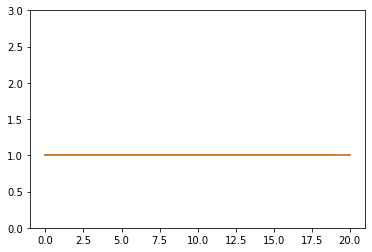

In [218]:
BECHoldTimeComp = 0
ODT3_Comp_final = 3
listRatio = []
plt.figure()
for latticeDetuning_GHz in latticeDetuningList:
    for latticeDepth_mW in latticeDepthList:
        df_temp = getSubDF(df_inSitu, ['latticeDetuning_GHz', 'latticeDepth_mW', 'ODT3_Comp_final'], [latticeDetuning_GHz, latticeDepth_mW, ODT3_Comp_final]).groupby(['BECHoldTime']).mean().reset_index()
        xInit = df_temp[df_temp['BECHoldTime'] == 0]['xWidth_inSitu_v_um'].mean()
        xFinal = df_temp[df_temp['BECHoldTime'] == BECHoldTimeComp]['xWidth_inSitu_v_um'].mean()
        listRatio += [xFinal/xInit]
        plt.plot([1]*len(listRatio))
plt.ylim(0, 3)
plt.plot(listRatio)

In [219]:
df_TOF

,BECHoldTime,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,dummy,nCount,xWidth,yWidth,...,experiment,ODTFactor,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz
0,5.0,4.0,20.0,-1.0,7.72,0.38,1.0,3230.0,28.60870,10.46590,...,TOF,4.0,42.455833,15.531587,149.098585,112.297140,140.0,56.0,930.948733,922.063742
1,5.0,4.0,0.2,-1.0,7.72,0.38,2.0,29260.0,13.28090,13.53900,...,TOF,4.0,19.709098,20.092123,14.909859,35.511474,140.0,56.0,167.542996,107.734189
2,1.0,4.0,20.0,-1.0,7.72,0.38,1.0,6962.0,43.33880,12.31040,...,TOF,4.0,64.315571,18.268858,149.098585,112.297140,140.0,56.0,930.948733,922.063742
3,20.0,4.0,20.0,-1.0,7.40,0.38,2.0,10233.0,5.87819,4.79507,...,TOF,4.0,8.723341,7.115971,149.098585,112.297140,140.0,56.0,930.948733,922.063742
4,2.0,4.0,1.0,-1.0,7.72,0.38,1.0,29191.0,17.54090,14.80730,...,TOF,4.0,26.031016,21.974304,33.339457,53.102039,140.0,56.0,248.904153,213.282154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,20.0,4.0,60.0,-5.0,7.72,0.38,1.0,12199.0,1.15479,544.26500,...,TOF,4.0,1.713729,807.699201,121.947456,101.558975,140.0,56.0,765.670126,754.842196
528,0.0,4.0,0.5,-5.0,7.40,0.38,2.0,34364.0,11.96040,12.50850,...,TOF,4.0,17.749452,18.562842,11.132229,30.684779,140.0,56.0,155.955409,88.645866
529,0.0,4.0,1.0,-5.0,7.40,0.38,2.0,28598.0,12.17240,10.81390,...,TOF,4.0,18.064064,16.048025,15.743349,36.490557,140.0,56.0,170.423528,112.161397
530,2.0,4.0,60.0,-5.0,7.40,0.38,1.0,24200.0,32.96790,21.14350,...,TOF,4.0,48.924966,31.377340,121.947456,101.558975,140.0,56.0,765.670126,754.842196


In [220]:
df_TOF2 = getSubDF(df_TOF, ['latticeDepth_mW', 'latticeDetuning_GHz'], [0.2, 20])

df_TOF2[['latticeDepth_mW', 'latticeDetuning_GHz', 'ODTFactor', 'trapFrequencyX_Hz', 'trapFrequencyY_Hz']]

,latticeDepth_mW,latticeDetuning_GHz,ODTFactor,trapFrequencyX_Hz,trapFrequencyY_Hz


In [221]:
# This is where we choose the different parameter to use from the inSitu measurement

ODT3_Comp_final = 5
BECHoldTime = 0

df_inSitu_mean = getSubDF(df_inSitu, ['BECHoldTime', 'ODT3_Comp_final'], [BECHoldTime, ODT3_Comp_final]).groupby(['latticeDetuning_GHz', 'latticeDepth_mW']).mean().reset_index()
df = pd.merge(df_TOF, df_inSitu_mean, how="outer", on=["latticeDetuning_GHz", "latticeDepth_mW"], suffixes=('', '_y'))#, validate="many_to_many")
df.drop(df.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
#df3.drop_duplicates(cols=['imageID', 'xWidth'],inplace=True)
df.columns

Index(['BECHoldTime', 'TOF', 'latticeDepth_mW', 'latticeDetuning_GHz', 'compz',
       'ODT3_Comp_final', 'dummy', 'nCount', 'xWidth', 'yWidth', 'xPos',
       'yPos', 'imageID', 'experiment', 'ODTFactor', 'xWidth_TOF_h_um',
       'zWidth_TOF_h_um', 'trapFrequencyZ_kHz', 'deconfiningTrapFrequency_Hz',
       'bareTrapFrequencyX_Hz', 'bareTrapFrequencyY_Hz', 'trapFrequencyX_Hz',
       'trapFrequencyY_Hz', 'xWidth_inSitu_v_um', 'yWidth_inSitu_v_um',
       'rWidth_inSitu_v_um', 'rWidth_calculated_um'],
      dtype='object')

In [222]:
#df_TOF.head()
#df_inSitu_mean.head()
df[df['latticeDetuning_GHz'] == -5]['latticeDepth_mW'].unique()

array([  1. , 120. ,   5. ,   0.5,   0.2,  60. ,  20. ])

# Old stuff

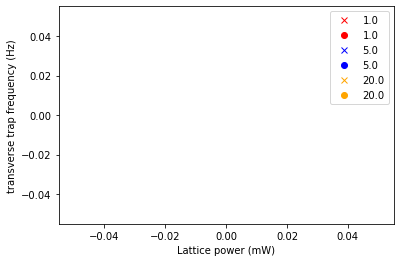

In [223]:
plt.figure()
i = 0
for latticeDetuning in latticeDetuningList:
    df_temp = getSubDF(df, ['latticeDetuning_GHz'], [latticeDetuning])
    plt.plot(df_temp['latticeDepth_mW'], df_temp['deconfiningTrapFrequency_Hz'], 'x', color = colors[i], label = latticeDetuning)
    plt.plot(df_temp['latticeDepth_mW'], df_temp['trapFrequencyX_Hz'], 'o', color = colors[i], label = latticeDetuning)
    i += 1
plt.legend()
plt.xlabel('Lattice power (mW)')
plt.ylabel('transverse trap frequency (Hz)')
plt.show()

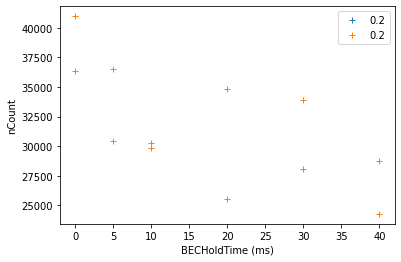

In [224]:
latticeDetuning = -20
compz = 7.4
ODTFactor = 4
plt.figure()
for latticeDepth in [0.2]:#, 20, 120]:
    for ODTFactor in [1, 4]:
        df_temp = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz', 'ODTFactor'], [latticeDepth, latticeDetuning, compz, ODTFactor])
        plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '+', label = str(round(latticeDepth, 2)))
plt.legend()
#plt.ylim(0, 5000)
#plt.ylim(0,25000)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

In [225]:
getSubDF(df_TOF, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [120, -5, 7.4])

,BECHoldTime,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,dummy,nCount,xWidth,yWidth,...,experiment,ODTFactor,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz
0,30.0,4.0,120.0,-5.0,7.4,0.38,1.0,14945.0,60.2925,50.6309,...,TOF,4.0,89.475171,75.137180,172.459746,120.774655,140.0,56.0,1073.732501,1066.038218
1,5.0,4.0,120.0,-5.0,7.4,0.38,1.0,17993.0,39.5280,37.1542,...,TOF,4.0,58.660274,55.137511,172.459746,120.774655,140.0,56.0,1073.732501,1066.038218
2,10.0,4.0,120.0,-5.0,7.4,0.38,2.0,12260.0,59.7694,48.6992,...,TOF,4.0,88.698881,72.270502,172.459746,120.774655,140.0,56.0,1073.732501,1066.038218
3,30.0,4.0,120.0,-5.0,7.4,0.38,2.0,9675.0,36.8822,287.2360,...,TOF,4.0,54.733858,426.263470,172.459746,120.774655,140.0,56.0,1073.732501,1066.038218
4,2.0,4.0,120.0,-5.0,7.4,0.38,2.0,19872.0,38.7816,32.2715,...,TOF,4.0,57.552603,47.891495,172.459746,120.774655,140.0,56.0,1073.732501,1066.038218
5,2.0,4.0,120.0,-5.0,7.4,0.38,1.0,28209.0,38.9504,31.3234,...,TOF,4.0,57.803105,46.484498,172.459746,120.774655,140.0,56.0,1073.732501,1066.038218
6,10.0,4.0,120.0,-5.0,7.4,0.38,1.0,19490.0,38.5626,59.1039,...,TOF,4.0,57.227603,87.711267,172.459746,120.774655,140.0,56.0,1073.732501,1066.038218
7,0.0,4.0,120.0,-5.0,7.4,0.38,2.0,28158.0,37.5514,31.1273,...,TOF,4.0,55.726963,46.193482,172.459746,120.774655,140.0,56.0,1073.732501,1066.038218
8,5.0,4.0,120.0,-5.0,7.4,0.38,2.0,20006.0,43.0456,48.0212,...,TOF,4.0,63.880457,71.264338,172.459746,120.774655,140.0,56.0,1073.732501,1066.038218
9,0.0,4.0,120.0,-5.0,7.4,0.38,1.0,32068.0,41.9123,25.8653,...,TOF,4.0,62.198619,38.384578,172.459746,120.774655,140.0,56.0,1073.732501,1066.038218


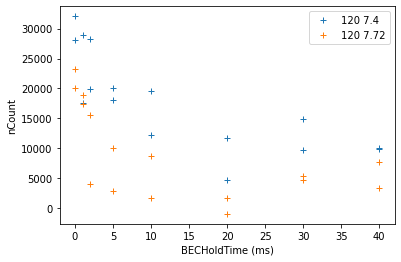

In [226]:
latticeDetuning = -5
plt.figure()
for latticeDepth in [120]:#, 20, 120]:
    df_temp_1 = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, 7.4])
    df_temp_2 = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, 7.72])
    plt.plot(df_temp_1['BECHoldTime'], df_temp_1['nCount'], '+', label = str(round(latticeDepth, 2)) + ' 7.4')
    plt.plot(df_temp_2['BECHoldTime'], df_temp_2['nCount'], '+', label = str(round(latticeDepth, 2)) + ' 7.72')
plt.legend()
#plt.ylim(0, 5000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

In [227]:
resultsDF_pure = fitDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz', 'ODTFactor'], fitType = 'pure')
resultsDF_pure.drop(columns = ['BECHoldTime', 'xWidth', 'yWidth', 'imageID', 'dummy'], inplace = True)
resultsDF_pure['compz'] = resultsDF_pure['compz'].round(3)

resultsDF_mix = fitDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz', 'ODTFactor'], fitType = 'mix')
resultsDF_mix.drop(columns = ['BECHoldTime', 'xWidth', 'yWidth', 'imageID', 'dummy'], inplace = True)
resultsDF_mix['compz'] = resultsDF_mix['compz'].round(3)

resultsDF_lin = fitDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz', 'ODTFactor'], fitType = 'lin')
resultsDF_lin.drop(columns = ['BECHoldTime', 'xWidth', 'yWidth', 'imageID', 'dummy'], inplace = True)
resultsDF_lin['compz'] = resultsDF_lin['compz'].round(3)





"""def N_polarized(t, N0, alpha, gamma):
    return np.sqrt(alpha / (np.exp(2*alpha*t)*(alpha/(N0**2)+gamma)-gamma))

def N_linear(t, N0, b):
    return N0-b*t

def N_polarized_pure3b(t, N0, gamma):
    return N0 / np.sqrt(1+N0**2*gamma*t)"""


#print('\n')
#print(resultsDF)
#perr = np.sqrt(np.diag(pcov))

/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


'def N_polarized(t, N0, alpha, gamma):\n    return np.sqrt(alpha / (np.exp(2*alpha*t)*(alpha/(N0**2)+gamma)-gamma))\n\ndef N_linear(t, N0, b):\n    return N0-b*t\n\ndef N_polarized_pure3b(t, N0, gamma):\n    return N0 / np.sqrt(1+N0**2*gamma*t)'

In [228]:
latticeDepth = 20
latticeDetuning = -1
compz = 7.72
ODTFactor = 4
df_tempZ = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz', 'ODTFactor'], [latticeDepth, latticeDetuning, compz, ODTFactor])
time = np.linspace(0, 800, 10000)

In [229]:
df

,BECHoldTime,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,dummy,nCount,xWidth,yWidth,...,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz,xWidth_inSitu_v_um,yWidth_inSitu_v_um,rWidth_inSitu_v_um,rWidth_calculated_um
0,5.0,4.0,20.0,-1.0,7.72,0.38,1.0,3230.0,28.60870,10.46590,...,149.098585,112.297140,140.0,56.0,930.948733,922.063742,NaN,NaN,NaN,NaN
1,1.0,4.0,20.0,-1.0,7.72,0.38,1.0,6962.0,43.33880,12.31040,...,149.098585,112.297140,140.0,56.0,930.948733,922.063742,NaN,NaN,NaN,NaN
2,20.0,4.0,20.0,-1.0,7.40,0.38,2.0,10233.0,5.87819,4.79507,...,149.098585,112.297140,140.0,56.0,930.948733,922.063742,NaN,NaN,NaN,NaN
3,0.0,4.0,20.0,-1.0,7.40,0.38,1.0,35689.0,35.48220,17.69780,...,149.098585,112.297140,140.0,56.0,930.948733,922.063742,NaN,NaN,NaN,NaN
4,2.0,4.0,20.0,-1.0,7.72,0.38,1.0,4940.0,38.68590,12.28210,...,149.098585,112.297140,140.0,56.0,930.948733,922.063742,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,10.0,4.0,20.0,-5.0,7.40,0.38,1.0,26254.0,24.69350,21.06880,...,70.406397,77.168133,140.0,56.0,456.600022,438.200389,NaN,NaN,NaN,NaN
528,10.0,4.0,20.0,-5.0,7.72,0.38,1.0,8616.0,26.98620,23.78160,...,70.406397,77.168133,140.0,56.0,456.600022,438.200389,NaN,NaN,NaN,NaN
529,1.0,4.0,20.0,-5.0,7.72,0.38,2.0,28452.0,23.78130,20.55610,...,70.406397,77.168133,140.0,56.0,456.600022,438.200389,NaN,NaN,NaN,NaN
530,20.0,4.0,20.0,-5.0,7.40,0.38,2.0,21746.0,25.72440,25.69050,...,70.406397,77.168133,140.0,56.0,456.600022,438.200389,NaN,NaN,NaN,NaN


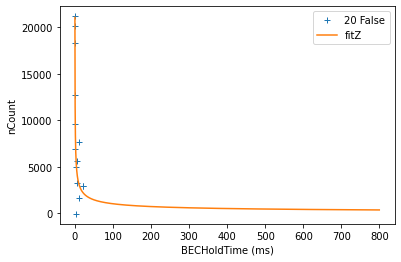

In [230]:
resultZ = getSubDF(resultsDF_pure, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, gammaZ = resultZ[['N0', 'gamma']].iloc[0,:]
Z = N_polarized_pure3b(time, NZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
#plt.ylim(0, 20000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

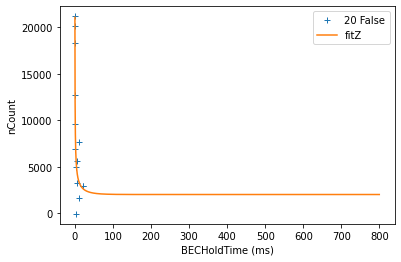

In [231]:
resultZ = getSubDF(resultsDF_mix, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, alphaZ, gammaZ = resultZ[['N0', 'alpha', 'gamma']].iloc[0,:]

Z = N_polarized(time, NZ, alphaZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
#plt.ylim(0,20000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

In [232]:
resultZ

,N0,alpha,gamma,b,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,nCount,...,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz,xWidth_inSitu_v_um,yWidth_inSitu_v_um,rWidth_inSitu_v_um,rWidth_calculated_um
0,21084.841999,-0.020409,4.984953e-09,NaN,4.0,20.0,-1.0,7.72,0.38,8418.714286,...,149.098585,112.29714,140.0,56.0,930.948733,922.063742,NaN,NaN,NaN,NaN


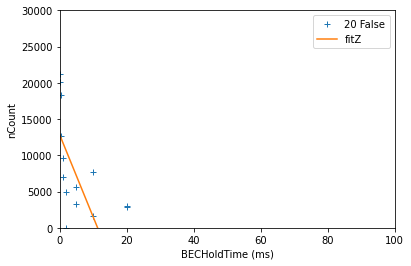

In [233]:
resultZ = getSubDF(resultsDF_lin, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, bZ = resultZ[['N0', 'b']].iloc[0,:]

Z = N_linear(time, NZ, bZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
plt.ylim(0,30000)
plt.xlim(0,100)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

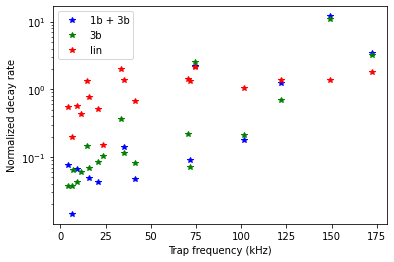

In [234]:
resultsDF_notLossy = getSubDF(resultsDF_mix, ['compz'], [compz])
resultsDF_notLossy_pure = getSubDF(resultsDF_pure, ['compz'], [compz])
resultsDF_notLossy_lin = getSubDF(resultsDF_lin, ['compz'], [compz])

#latticePower = -resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning']
trapFrequencyList = resultsDF_notLossy['trapFrequencyZ_kHz']
decay_1b3b = resultsDF_notLossy['gamma']/resultsDF_notLossy['gamma'].mean()
decay_3b = resultsDF_notLossy_pure['gamma']/resultsDF_notLossy_pure['gamma'].mean()
decay_lin = resultsDF_notLossy_lin['b']/resultsDF_notLossy_lin['b'].mean()

plt.figure()
plt.semilogy(trapFrequencyList, decay_1b3b, 'b*', label = '1b + 3b')
plt.semilogy(trapFrequencyList, decay_3b, 'g*', label = '3b')
plt.semilogy(trapFrequencyList, decay_lin, 'r*', label = 'lin')
plt.xlabel("Trap frequency (kHz)")
plt.ylabel("Normalized decay rate")


plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

The increase in power should result in a smaller cloud. The density is proportional to $n\sim 1/(a_{oh}r_{\perp}^{2}) \sim \sqrt{\omega_{z}}\frac{\omega_{\perp}^{2}}{\mu}$. Assuming the chemical potential constant, the density $n$ goes like $(P/\Delta)^{5/4}$. In that case the decay coefficient which is proportional to $n^{2}$ should be scalled accordingly.
If we rather fix the scattering length $a$ and write $\mu\sim na$ then at constant $a$ it gives $n \sim (P/\Delta)^{5/8})$.

And $P/\Delta \propto \omega_{z}^{2}$

Note for a thermal cloud that gets compressed from $\omega_i$ to $\omega_f = k\omega_i$. $E_i = \sum \epsilon_i p_i$ and $E_f = \sum \epsilon_f p_f = \sum (k\epsilon_i) p_i = kE_i$. So the temperature goes like $T_f = kT_i$. But the probability to occupy each state remains the same, so $\omega^2 \Delta x^2/T = $ cste. There for $\Delta x_f = \Delta x_i/\sqrt{k}$. So a good proxy for the density is $n \propto 1/(a_z r^2) \propto \omega_z^{1/2} \sqrt{k}^{2} \propto \omega_z^{3/2}$. Or if we want to be more precise and take into consideration the ODT trapping, one should say $n \propto \omega_z^{1/2}\omega_{\perp,1}^{1/2}\omega_{\perp,2}^{1/2}$

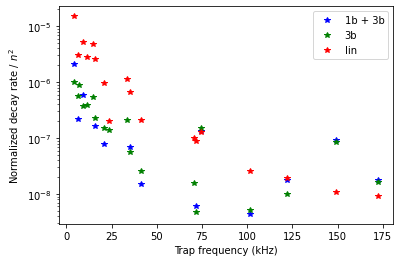

In [235]:
powerExponent = 3/2
# 3/2 for 2D thermal + 1D HO
# 5/2 for 2D BEC fixed chemical potential (wrong) + 1D HO
# 5/4 for 2D BEC fixed scattering length + 1D HO

trapFrequencyList = resultsDF_notLossy['trapFrequencyZ_kHz']
decay_1b3b = resultsDF_notLossy['gamma']/resultsDF_notLossy['gamma'].mean()/(trapFrequencyList**2)**(powerExponent)
decay_3b = resultsDF_notLossy_pure['gamma']/resultsDF_notLossy_pure['gamma'].mean()/(trapFrequencyList**2)**(powerExponent)
decay_lin = resultsDF_notLossy_lin['b']/resultsDF_notLossy_lin['b'].mean()/(trapFrequencyList**2)**(powerExponent)
### That was the previous scaling before we changed to take into account the ODT trapping

### Now it is simple n^2 \propto omega_z * omega_perp1^2 * omega_perp2^2
trapFrequencyList = resultsDF_notLossy['trapFrequencyZ_kHz']
trapFrequencyPerp1List = resultsDF_notLossy['trapFrequencyX_Hz']
trapFrequencyPerp2List = resultsDF_notLossy['trapFrequencyY_Hz']
decay_1b3b = resultsDF_notLossy['gamma']/resultsDF_notLossy['gamma'].mean()/(trapFrequencyList*trapFrequencyPerp1List*trapFrequencyPerp2List)
decay_3b = resultsDF_notLossy_pure['gamma']/resultsDF_notLossy_pure['gamma'].mean()/(trapFrequencyList*trapFrequencyPerp1List*trapFrequencyPerp2List)
decay_lin = resultsDF_notLossy_lin['b']/resultsDF_notLossy_lin['b'].mean()/(trapFrequencyList*trapFrequencyPerp1List*trapFrequencyPerp2List)


plt.figure()
plt.semilogy(trapFrequencyList, decay_1b3b, 'b*', label = '1b + 3b')
plt.semilogy(trapFrequencyList, decay_3b, 'g*', label = '3b')
plt.semilogy(trapFrequencyList, decay_lin, 'r*', label = 'lin')

plt.xlabel("Trap frequency (kHz)")
plt.ylabel("Normalized decay rate / $n^2$")
plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

Let's use only the pure 3b fit

In [236]:
results = resultsDF_pure
#results = resultsDF_lin

# Vertical deconvolution

In [237]:
xResolution_um = 3.02
yResolution_um = 3.46
results['xWidth_inSitu_v_um'] = np.sqrt(results['xWidth_inSitu_v_um']**2-xResolution_um**2)
results['yWidth_inSitu_v_um'] = np.sqrt(results['yWidth_inSitu_v_um']**2-yResolution_um**2)

In [238]:
latticeDepthList = np.sort(df['latticeDepth_mW'].unique())
BECHoldTimeList = np.sort(df['BECHoldTime'].unique())
latticeDetuningList = np.sort(df['latticeDetuning_GHz'].unique())
compzList = np.sort(df['compz'].unique())
ODTFactorList = np.sort(df['ODTFactor'].unique())

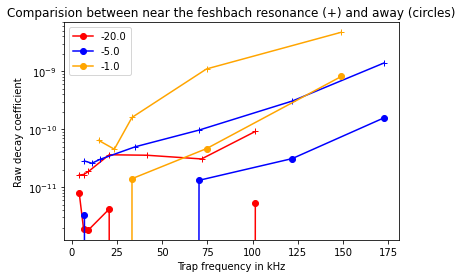

In [239]:
plt.figure()
i = 0
for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, 7.4])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, 7.72])
    plt.semilogy(decay_notlossy['trapFrequencyZ_kHz'], decay_notlossy['gamma'], color = colors[i], marker = 'o', label = latticeDetuning)
    plt.semilogy(decay_lossy['trapFrequencyZ_kHz'], decay_lossy['gamma'], color = colors[i], marker = '+')
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel('Raw decay coefficient')
plt.title('Comparision between near the feshbach resonance (+) and away (circles)')
plt.show()

The average xWidth of the cloud is 4.36 pixel and yWidth is 4.45, each are 6.5 micro meters big and magnification is 4. It makes 7 micrometers cloud size (one sigma), so approximately 40 pancakes filled.

The nCount of the previous data was accounting a 3.45 micro meters pixel and 1 magnification, this should be corrected accordingly

For the temperature : $\sigma = \sqrt{\sigma_0^{2}+(\sigma_v\tau)^2}$ with $\sigma_{0} = 7 \mu m$ and $\tau$ the time of flight. And $\sigma_{v} = \sqrt{\frac{k_{B}T}{m}}$ so $T = \frac{m}{k_{B}}\frac{\sigma^2-\sigma^2_0}{\tau^2}$

In [240]:
sigma_0_um = 7

#df['temperature'] = (m/k_B*((df['xWidth_TOF_h_um']*um)**2-(df['xWidth_inSitu_v_um']*um)**2)/((df['TOF']*ms)**2))/nK # in nano kelvin
# if you use xWidth_inSitu_v_um there is nothing for red detuned runs

df['temperature_nK'] = (m/k_B*((df['xWidth_TOF_h_um']*um)**2-(sigma_0_um*um)**2)/((df['TOF']*ms)**2))/nK # in nano kelvin
df[['xWidth', 'xWidth_TOF_h_um','temperature_nK']]

,xWidth,xWidth_TOF_h_um,temperature_nK
0,28.60870,42.455833,2160.762301
1,43.33880,64.315571,5036.846977
2,5.87819,8.723341,33.390115
3,35.48220,52.656233,3356.276042
4,38.68590,57.410582,4001.112019
...,...,...,...
527,24.69350,36.645605,1594.419543
528,26.98620,40.048014,1915.968777
529,23.78130,35.291884,1474.418130
530,25.72440,38.175479,1735.472293


In [241]:
df_temperature = df.groupby(['latticeDetuning_GHz', 'BECHoldTime', 'latticeDepth_mW', 'ODTFactor', 'compz']).mean().reset_index()
df_initial_temperature = getSubDF(df_temperature, ['BECHoldTime'], [0]).groupby(['latticeDetuning_GHz', 'latticeDepth_mW', 'compz', 'ODTFactor']).mean().reset_index()

In [242]:
df_initial_temperature

,latticeDetuning_GHz,latticeDepth_mW,compz,ODTFactor,BECHoldTime,TOF,ODT3_Comp_final,dummy,nCount,xWidth,...,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz,xWidth_inSitu_v_um,yWidth_inSitu_v_um,rWidth_inSitu_v_um,rWidth_calculated_um,temperature_nK
0,-20.0,0.2,7.40,4.0,0.0,5.0,0.38,1.5,38664.5,15.34135,...,18.724379,140.0,56.0,142.319165,61.569023,NaN,NaN,NaN,NaN,370.143996
1,-20.0,0.2,7.72,4.0,0.0,5.0,0.38,1.5,34290.0,16.07890,...,18.724379,140.0,56.0,142.319165,61.569023,NaN,NaN,NaN,NaN,410.599291
2,-20.0,0.5,7.40,4.0,0.0,5.0,0.38,1.5,34757.0,15.04400,...,23.544660,140.0,56.0,145.728726,69.085900,NaN,NaN,NaN,NaN,354.457397
3,-20.0,0.5,7.72,4.0,0.0,5.0,0.38,1.5,29846.0,15.56000,...,23.544660,140.0,56.0,145.728726,69.085900,NaN,NaN,NaN,NaN,381.899684
4,-20.0,1.0,7.40,4.0,0.0,5.0,0.38,1.5,33246.5,15.01380,...,27.999478,140.0,56.0,151.240613,80.060746,NaN,NaN,NaN,NaN,352.886893
5,-20.0,1.0,7.72,4.0,0.0,5.0,0.38,1.5,35394.0,15.19085,...,27.999478,140.0,56.0,151.240613,80.060746,NaN,NaN,NaN,NaN,362.312085
6,-20.0,5.0,7.40,4.0,0.0,5.0,0.38,1.5,35913.5,16.92860,...,41.868985,140.0,56.0,189.653936,139.658926,NaN,NaN,NaN,NaN,459.123050
7,-20.0,5.0,7.72,4.0,0.0,5.0,0.38,1.5,34558.0,17.22965,...,41.868985,140.0,56.0,189.653936,139.658926,NaN,NaN,NaN,NaN,476.997295
8,-20.0,20.0,7.40,4.0,0.0,5.0,0.38,1.5,26058.0,23.79985,...,59.211686,140.0,56.0,291.675269,261.935989,NaN,NaN,NaN,NaN,945.762628
9,-20.0,20.0,7.72,4.0,0.0,5.0,0.38,1.5,33867.5,23.27085,...,59.211686,140.0,56.0,291.675269,261.935989,NaN,NaN,NaN,NaN,902.250092


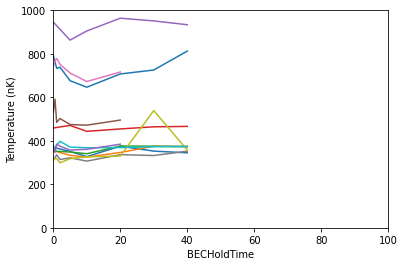

In [243]:
compz = 7.4
plt.figure()
for latticeDetuning in latticeDetuningList[-20:]:
    for latticeDepth in latticeDepthList:
        df_temp = getSubDF(df_temperature, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])
        plt.plot(df_temp['BECHoldTime'], df_temp['temperature_nK'] )
plt.ylim(0,1000)
plt.xlim(0,100)
plt.xlabel('BECHoldTime')
plt.ylabel('Temperature (nK)')
plt.show()

The density is $N/V \simeq N/(2a_z(2a_{\perp})^2) = N/\left(8\sqrt{\hbar/(m\omega_z)}\sqrt{k_B T/m\omega_\perp^2}^{2}\right) = \frac{N m^{3/2}\omega_z^{1/2}\omega_\perp}{8\hbar^{1/2} k_B T} = \frac{N m^{3/2}\omega_z^{5/2}}{8A^2\hbar^{1/2} k_B T}$ with $A = \omega_z / \omega_\perp$ the aspect ratio (A = 162)

More precise calculation would be $P(r,z) = K e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}}$ and normalization condition gives for the N-particle 3D density probability $n(r,z) = \frac{N m \omega_\perp^{2}}{\pi^{3/2}\sqrt{2}a_z k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}} = \frac{N m^{3/2} \omega_z^{5/2}}{\pi^{3/2}\sqrt{2}\hbar^{1/2}A^{2} k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}}$. And we have $\pi^{3/2}\sqrt{2} = 7.87 \simeq 8$.

Eventually we changed this analysis to take into account the ODT trapping potential and we are keeping $n(r,z) = \frac{N m \omega_\perp^{2}}{\pi^{3/2}\sqrt{2}a_z k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}} = \frac{N m^{3/2}\omega_z^{1/2} \omega_\perp^{2}}{\pi^{3/2}\sqrt{2}\hbar^{1/2} k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}}$

Note that here the dependance looks to be like $\omega_z^{5/2}$ but there is a dependance hidden in the temperature that should go up like $\omega$, starting from 90-200 Hz in the ODT, up to 2 kHz in the deepest lattice, so there should be a factor of 10 there.

Now we can put units on the 3-body coefficient. WRONG: From the fit we get $\gamma = \beta<n^2>$. And the time unit of the fit is ms.
I keep the mistake here because it caused me some trouble. The real expression is $\beta = \gamma V^2$. Indeed $\frac{dN}{dt} = -\gamma N^3$ for the fit and $\frac{dN}{dt} = -\beta<n^2>N = -\beta/V^2 N^3$. Volume here is understood as the volume of all the pancakes combined.

# Notes from the BEC Calculation


## Temperature and trap frequency

### In BEC

In the BEC the density is like $n(x, y, z) = K e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2 + \omega_z^2 z^2)}{k_B T}} = N\omega_x\omega_y\omega_z\left(\frac{m}{2\pi k_B T}\right)^{3/2} e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2 + \omega_z^2 z^2)}{k_B T}} = n_0 e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2 + \omega_z^2 z^2)}{k_B T}}$

By definition $<n^2> = \int n^2p(x, y, z)d\tau = \frac{1}{N}\int n^3 d\tau = N^2 (\omega_x\omega_y\omega_z)^2\frac{1}{\sqrt{27}}\left(\frac{m}{2\pi k_B T}\right)^3 = \frac{N^2}{\sqrt{27}(2\pi)^3(\sigma_x\sigma_y\sigma_z)^2}$. The differential equation formula is: $\frac{dN}{dt} = -\gamma N^3$ in the fit, but $\frac{dN}{dt} = -\beta <n^2> N$ in reality, so $\frac{dN}{dt} = -\beta \frac{N^2}{\alpha} N$ with $\alpha = 3^{3/2}\left(\frac{2\pi k_B T}{m}\right)^3\frac{1}{(\omega_x\omega_y\omega_z)^2} = 3^{3/2}(2\pi)^3(\sigma_x\sigma_y\sigma_z)^2 = \frac{3^{3/2}}{(n_0/N)^2}$, so $\beta = \gamma\alpha$

### In the lattice

Note: I should use the full calculation of the gaussian wavepacket, in the mean time I can define a fake $\frac{1}{\bar a_z} = \frac{1}{\lambda /2\sqrt{2\pi}} + \frac{1}{a_z}$.
Indeed, for deep lattices, the density is $n(x, y, z) = n_0 e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2)}{k_B T}}e^{-\frac{z^2}{2a_z^2}}$ and therefore $\boxed{n_0 = \frac{Nm\omega_x\omega_y}{(2\pi)^{3/2}k_B T a_z} = \frac{Nm^{3/2}\omega_x\omega_y\omega_z^{1/2}}{(2\pi)^{3/2}k_B T \sqrt{\hbar}}}$ but in the case of a very weak lattice $a_z$ should saturate to a fixed value. Write the 3D density $n(x, y, z) = n_0 e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2)}{k_B T}}$ and integrate it on one lattice site $z = -\lambda/4 .. \lambda /4$ gives that $\frac{\lambda}{2} = \sqrt{2\pi a_{z,saturated}^2}$. A good interpolation would be $\frac{1}{\bar a_z} = \frac{1}{\lambda /2\sqrt{2\pi}} + \frac{1}{a_z}$. And it leads to the effective $\bar \omega_z = \left( \sqrt{\omega_z} + \frac{2\sqrt{2\pi}}{\lambda}\sqrt{\frac{\hbar}{m}}\right)^2 = \left( \sqrt{\omega_z} + \frac{2}{\sqrt{\pi}}\sqrt{\frac{E_r}{\hbar}}\right)^2$. The correction at $\omega_z = 0$ is about 2.8 kHz.

Then we again have $<n^2> = n_0^2/\sqrt{27}$ and the local differential equation is $\frac{dn}{dt} = -\beta n^2 n$ which integrated over the volume gives$\int_V \frac{dn}{dt} = \frac{dN}{dt} = -\int_V \beta n^2 n d\tau = -\int_V \beta n^2 Np(\tau) d\tau = -\beta <n(t)^2>N = -\beta\frac{n_0^2\left(\frac{N(t)}{N_0}\right)^2}{\sqrt{27}}N$. So eventually $\boxed{\frac{dN}{dt} =-\beta\frac{n_0^2}{N_0^2\sqrt{27}}N^3} = -\gamma N^3$

## In situ measurement

Other way to calculate the volume, simply use the in situ imaging with the density being $N/V \simeq N/(2a_x 2a_y 2a_z)^2) = \frac{N}{8(7\mu m 7.3\mu m 18\mu m)}$. Actually more precise calculation gives: $n = \frac{N}{(2\pi)^{3/2}\sigma_x\sigma_y\sigma_z}e^{-\frac{1}{2}(\frac{x^2}{\sigma_x^2}+\frac{y^2}{\sigma_y^2}+\frac{z^2}{\sigma_z^2})}$ and therefore $<n^2> = \frac{1}{N}\int n^3 d\tau = \frac{N^2}{3^{3/2}(2\pi)^3(\sigma_x\sigma_y\sigma_z)^2}$.

In [244]:
def effectiveOmegaZ(omega):
    return (np.sqrt(omega)+2*np.sqrt(2*np.pi*hbar/m)/(741*nm))**2

results['effectiveTrapFrequencyZ_kHz'] = effectiveOmegaZ(results['trapFrequencyZ_kHz']*kHz)/kHz

In [245]:
numberOfPancakes_fromBEC = 40 # for ODT Prefactor of 1
numberOfPancakes = numberOfPancakes_fromBEC/np.sqrt(np.maximum(results['ODTFactor'], 1))

temperature_nK = 100
prefactor = (m/(2*np.pi))**(3/2)/(k_B*np.sqrt(hbar))
# I assume here 400 nK, but eventually we should do a proper thermometry of the initial cloud.

#results['density'] = results['N0']/numberOfPancakes*prefactor*(2*np.pi*results['trapFrequency']*10**3)**(5/2)/(temperature_nK*10**(-9))*10**(-6)  # in atoms / cm3
trapFrequenciesProduct = (results['effectiveTrapFrequencyZ_kHz']*kHz)**(1/2)*results['trapFrequencyX_Hz']*Hz*results['trapFrequencyY_Hz']*Hz

# MODIFY THE NUMBER OF PANCAKES HERE
results['density_constantT'] = results['N0']/numberOfPancakes*prefactor/(temperature_nK*nK)*trapFrequenciesProduct*cm3  # in atoms / cm3

In [246]:
results['beta_constantT'] = results['gamma']/ms  * results['N0']**2 * np.sqrt(27) / results['density_constantT']**2 # this is is cm^6/s

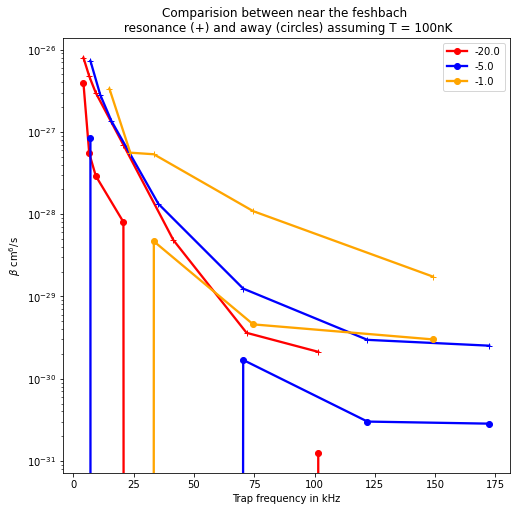

In [247]:
plt.figure(figsize = (8, 8))
i = 0
for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, 7.4])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, 7.72])
    for ODTFactor in decay_notlossy['ODTFactor'].unique():
        decay_notlossy_2 = getSubDF(decay_notlossy, ['ODTFactor'], [ODTFactor])
        decay_lossy_2 = getSubDF(decay_lossy, ['ODTFactor'], [ODTFactor])
        plt.semilogy(decay_notlossy_2['trapFrequencyZ_kHz'], decay_notlossy_2['beta_constantT'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
        plt.semilogy(decay_lossy_2['trapFrequencyZ_kHz'], decay_lossy_2['beta_constantT'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2)
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$\beta$ cm$^6/$s')
plt.title('Comparision between near the feshbach \n resonance (+) and away (circles) assuming T = 100nK')
plt.savefig('beta_coef.jpg', dpi = 300, transparent = False)
plt.show()

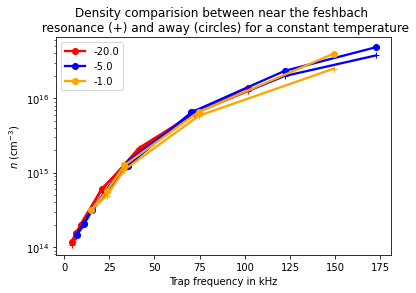

In [248]:
plt.figure()
i = 0

for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, 7.4])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, 7.72])
    for ODTFactor in decay_notlossy['ODTFactor'].unique():
        decay_notlossy_2 = getSubDF(decay_notlossy, ['ODTFactor'], [ODTFactor])
        decay_lossy_2 = getSubDF(decay_lossy, ['ODTFactor'], [ODTFactor])
        plt.semilogy(decay_notlossy_2['trapFrequencyZ_kHz'], decay_notlossy_2['density_constantT'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
        plt.semilogy(decay_lossy_2['trapFrequencyZ_kHz'], decay_lossy_2['density_constantT'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2)
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$n$ (cm$^{-3}$)')
plt.title('Density comparision between near the feshbach \n resonance (+) and away (circles) for a constant temperature')
plt.savefig('density.jpg', dpi = 300, transparent = False)
plt.show()

We can also do the version where we take the initial temperature of each run

## With temperature measurements

In [187]:
results = pd.merge(results, df_initial_temperature, how="outer", on=["latticeDetuning_GHz", "latticeDepth_mW", 'compz', 'ODTFactor'], suffixes=('', '_y'))#, validate="many_to_many")
results.drop(results.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

results['initialTemperature_nK'] = df_initial_temperature['temperature_nK'] # in nano kelvin
results['density_temperature'] = results['N0']/numberOfPancakes*prefactor/(results['initialTemperature_nK']*nK)*trapFrequenciesProduct*cm3  # in atoms / cm3
results['beta_temperature'] = results['gamma']/ms* results['N0']**2 * np.sqrt(27) / results['density_temperature']**2    # this is is cm^6/s

In [188]:
df_initial_temperature

,latticeDetuning_GHz,latticeDepth_mW,compz,ODTFactor,BECHoldTime,TOF,ODT3_Comp_final,dummy,nCount,xWidth,...,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz,xWidth_inSitu_v_um,yWidth_inSitu_v_um,rWidth_inSitu_v_um,rWidth_calculated_um,temperature_nK
0,-20.0,0.2,7.40,4.0,0.0,5.0,0.38,1.5,38664.5,15.34135,...,18.724379,140.0,56.0,142.319165,61.569023,NaN,NaN,NaN,NaN,370.143996
1,-20.0,0.2,7.72,4.0,0.0,5.0,0.38,1.5,34290.0,16.07890,...,18.724379,140.0,56.0,142.319165,61.569023,NaN,NaN,NaN,NaN,410.599291
2,-20.0,0.5,7.40,4.0,0.0,5.0,0.38,1.5,34757.0,15.04400,...,23.544660,140.0,56.0,145.728726,69.085900,NaN,NaN,NaN,NaN,354.457397
3,-20.0,0.5,7.72,4.0,0.0,5.0,0.38,1.5,29846.0,15.56000,...,23.544660,140.0,56.0,145.728726,69.085900,NaN,NaN,NaN,NaN,381.899684
4,-20.0,1.0,7.40,4.0,0.0,5.0,0.38,1.5,33246.5,15.01380,...,27.999478,140.0,56.0,151.240613,80.060746,NaN,NaN,NaN,NaN,352.886893
5,-20.0,1.0,7.72,4.0,0.0,5.0,0.38,1.5,35394.0,15.19085,...,27.999478,140.0,56.0,151.240613,80.060746,NaN,NaN,NaN,NaN,362.312085
6,-20.0,5.0,7.40,4.0,0.0,5.0,0.38,1.5,35913.5,16.92860,...,41.868985,140.0,56.0,189.653936,139.658926,NaN,NaN,NaN,NaN,459.123050
7,-20.0,5.0,7.72,4.0,0.0,5.0,0.38,1.5,34558.0,17.22965,...,41.868985,140.0,56.0,189.653936,139.658926,NaN,NaN,NaN,NaN,476.997295
8,-20.0,20.0,7.40,4.0,0.0,5.0,0.38,1.5,26058.0,23.79985,...,59.211686,140.0,56.0,291.675269,261.935989,NaN,NaN,NaN,NaN,945.762628
9,-20.0,20.0,7.72,4.0,0.0,5.0,0.38,1.5,33867.5,23.27085,...,59.211686,140.0,56.0,291.675269,261.935989,NaN,NaN,NaN,NaN,902.250092


In [189]:
results[['latticeDetuning_GHz', 'latticeDepth_mW', 'compz', 'ODTFactor', 'initialTemperature_nK']].iloc[:-5,:]

,latticeDetuning_GHz,latticeDepth_mW,compz,ODTFactor,initialTemperature_nK
0,-20.0,0.2,7.40,4.0,370.143996
1,-20.0,0.5,7.40,4.0,410.599291
2,-20.0,1.0,7.40,4.0,354.457397
3,-20.0,5.0,7.40,4.0,381.899684
4,-20.0,20.0,7.40,4.0,352.886893
5,-20.0,60.0,7.40,4.0,362.312085
6,-20.0,120.0,7.40,4.0,459.123050
7,-1.0,0.2,7.40,4.0,476.997295
8,-1.0,0.5,7.40,4.0,945.762628
9,-1.0,1.0,7.40,4.0,902.250092


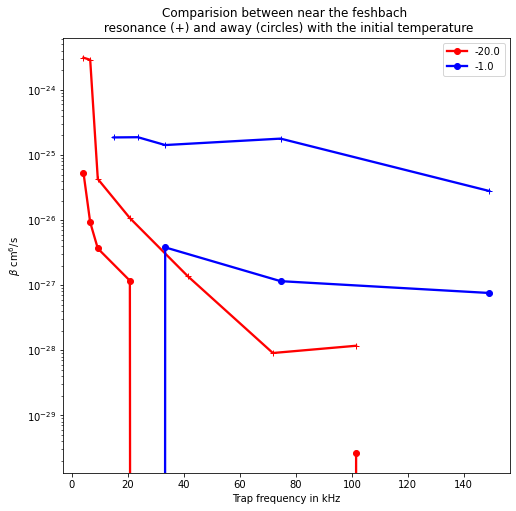

In [190]:
plt.figure(figsize = (8,8))
i = 0

for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, 7.4])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, 7.72])
    for ODTFactor in decay_notlossy['ODTFactor'].unique():
        decay_notlossy_2 = getSubDF(decay_notlossy, ['ODTFactor'], [ODTFactor])
        decay_lossy_2 = getSubDF(decay_lossy, ['ODTFactor'], [ODTFactor])
        plt.semilogy(decay_notlossy_2['trapFrequencyZ_kHz'], decay_notlossy_2['beta_temperature'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
        plt.semilogy(decay_lossy_2['trapFrequencyZ_kHz'], decay_lossy_2['beta_temperature'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2)
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$\beta$ cm$^6/$s')
plt.title('Comparision between near the feshbach \n resonance (+) and away (circles) with the initial temperature')
plt.show()

## With the size for the blue lattice

In [191]:
results.columns

Index(['N0', 'alpha', 'gamma', 'b', 'TOF', 'latticeDepth_mW',
       'latticeDetuning_GHz', 'compz', 'ODT3_Comp_final', 'nCount', 'xPos',
       'yPos', 'ODTFactor', 'xWidth_TOF_h_um', 'zWidth_TOF_h_um',
       'trapFrequencyZ_kHz', 'deconfiningTrapFrequency_Hz',
       'bareTrapFrequencyX_Hz', 'bareTrapFrequencyY_Hz', 'trapFrequencyX_Hz',
       'trapFrequencyY_Hz', 'xWidth_inSitu_v_um', 'yWidth_inSitu_v_um',
       'rWidth_inSitu_v_um', 'rWidth_calculated_um',
       'effectiveTrapFrequencyZ_kHz', 'density_constantT', 'beta_constantT',
       'BECHoldTime', 'dummy', 'xWidth', 'yWidth', 'imageID', 'temperature_nK',
       'initialTemperature_nK', 'density_temperature', 'beta_temperature'],
      dtype='object')

In [192]:
prefactor_size = 1/(2*np.pi)**(3/2)
a_z = np.sqrt(hbar/(m*results['trapFrequencyZ_kHz']*kHz))
size_product = results['xWidth_inSitu_v_um']*um*results['yWidth_inSitu_v_um']*um*a_z

results['density_size'] = results['N0']/numberOfPancakes*prefactor_size/size_product*cm3  # in atoms / cm3
results['beta_size'] = results['gamma']/ms* results['N0']**2 * np.sqrt(27) / results['density_size']**2    # this is is cm^6/s

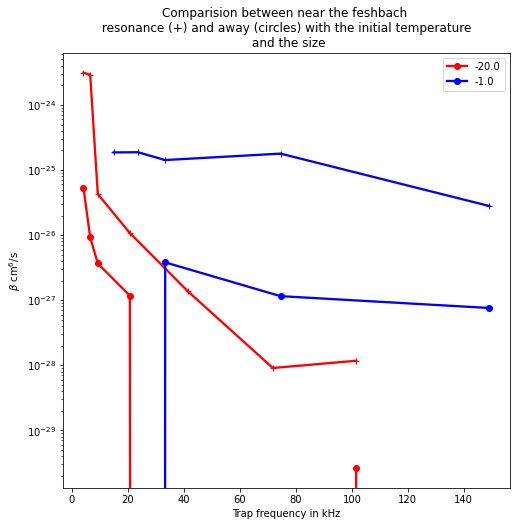

In [193]:
plt.figure(figsize = (8,8))
i = 0

for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, 7.4])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, 7.72])
    for ODTFactor in decay_notlossy['ODTFactor'].unique():
        if latticeDetuning < 0:
            decay_notlossy_2 = getSubDF(decay_notlossy, ['ODTFactor'], [ODTFactor])
            decay_lossy_2 = getSubDF(decay_lossy, ['ODTFactor'], [ODTFactor])
            plt.semilogy(decay_notlossy_2['trapFrequencyZ_kHz'], decay_notlossy_2['beta_temperature'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
            plt.semilogy(decay_lossy_2['trapFrequencyZ_kHz'], decay_lossy_2['beta_temperature'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2)
        if latticeDetuning > 0:
            decay_blue_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz', 'ODTFactor'], [latticeDetuning, 7.4, ODTFactor])
            #plt.semilogy(decay_blue_notlossy['trapFrequency']/(2*np.pi*10**3), decay_blue_notlossy['initialBeta'], color = colors[i], marker = 'x', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
            plt.semilogy(decay_blue_notlossy['trapFrequencyZ_kHz'], decay_blue_notlossy['beta_size'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = str(latticeDetuning) + ' size')
            decay_blue_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz', 'ODTFactor'], [latticeDetuning, 7.72, ODTFactor])
            #plt.semilogy(decay_blue_notlossy['trapFrequency']/(2*np.pi*10**3), decay_blue_notlossy['initialBeta'], color = colors[i], marker = 'x', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
            plt.semilogy(decay_blue_lossy['trapFrequencyZ_kHz'], decay_blue_lossy['beta_size'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2, label = str(latticeDetuning) + ' size')
            #plt.semilogy()
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$\beta$ cm$^6/$s')
plt.title('Comparision between near the feshbach \n resonance (+) and away (circles) with the initial temperature \n and the size')
plt.show()

In [194]:
results.columns

Index(['N0', 'alpha', 'gamma', 'b', 'TOF', 'latticeDepth_mW',
       'latticeDetuning_GHz', 'compz', 'ODT3_Comp_final', 'nCount', 'xPos',
       'yPos', 'ODTFactor', 'xWidth_TOF_h_um', 'zWidth_TOF_h_um',
       'trapFrequencyZ_kHz', 'deconfiningTrapFrequency_Hz',
       'bareTrapFrequencyX_Hz', 'bareTrapFrequencyY_Hz', 'trapFrequencyX_Hz',
       'trapFrequencyY_Hz', 'xWidth_inSitu_v_um', 'yWidth_inSitu_v_um',
       'rWidth_inSitu_v_um', 'rWidth_calculated_um',
       'effectiveTrapFrequencyZ_kHz', 'density_constantT', 'beta_constantT',
       'BECHoldTime', 'dummy', 'xWidth', 'yWidth', 'imageID', 'temperature_nK',
       'initialTemperature_nK', 'density_temperature', 'beta_temperature',
       'density_size', 'beta_size'],
      dtype='object')

In [195]:
getSubDF(results, ['latticeDetuning_GHz', 'latticeDepth_mW'], [1, 120])[['N0', 'gamma', 'density_size', 'xWidth_inSitu_v_um', 'yWidth_inSitu_v_um']]

,N0,gamma,density_size,xWidth_inSitu_v_um,yWidth_inSitu_v_um


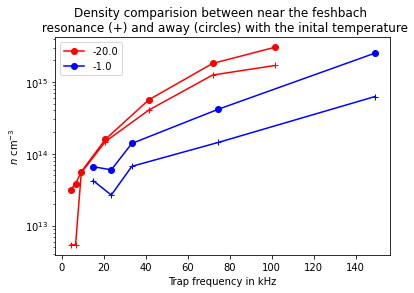

In [196]:
plt.figure()
i = 0
for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, 7.4])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, 7.72])
    plt.semilogy(decay_notlossy['trapFrequencyZ_kHz'], decay_notlossy['density_temperature'], color = colors[i], marker = 'o', label = latticeDetuning)
    plt.semilogy(decay_lossy['trapFrequencyZ_kHz'], decay_lossy['density_temperature'], color = colors[i], marker = '+')
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$n$ cm$^{-3}$')
plt.title('Density comparision between near the feshbach \n resonance (+) and away (circles) with the inital temperature')
plt.show()

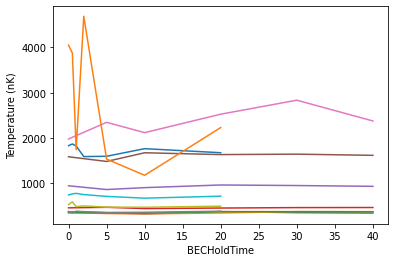

In [197]:
plt.figure()
for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_temp = getSubDF(df_temperature, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])
        plt.plot(df_temp['BECHoldTime'], df_temp['temperature_nK'] )
        #df_temp = getSubDF(df, ['latticeDepth', 'latticeDetuning', 'compz'], [latticeDepth, latticeDetuning, compz])
        #plt.plot(df_temp['BECHoldTime'], df_temp['yWidth'] )
        
#plt.ylim(0,100)
#plt.xlim(0,100)
plt.xlabel('BECHoldTime')
plt.ylabel('Temperature (nK)')
plt.show()

In [198]:
df_temp = getSubDF(df_inSitu, ['latticeDetuning_GHz', 'compz'], [20, 7.72]).groupby(['latticeDepth_mW']).mean().reset_index()
df_temp.columns

Index(['latticeDepth_mW', 'BECHoldTime', 'TOF', 'latticeDetuning_GHz', 'compz',
       'ODT3_Comp_final', 'dummy', 'nCount', 'xWidth', 'yWidth', 'xPos',
       'yPos', 'imageID', 'ODTFactor', 'xWidth_inSitu_v_um',
       'yWidth_inSitu_v_um', 'trapFrequencyZ_kHz',
       'deconfiningTrapFrequency_Hz', 'bareTrapFrequencyX_Hz',
       'bareTrapFrequencyY_Hz', 'trapFrequencyX_Hz', 'trapFrequencyY_Hz',
       'rWidth_inSitu_v_um', 'rWidth_calculated_um'],
      dtype='object')

In [199]:
df_inSitu['latticeDetuning_GHz'].unique()

array([ 1.,  5., 20.])

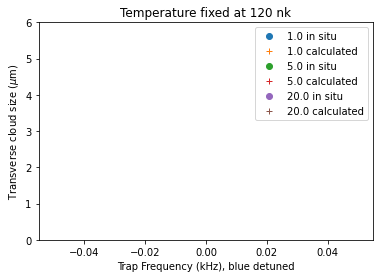

In [200]:
compz = 7.72
ODT3_Comp_final = 5

plt.figure()
for latticeDetuning in df_inSitu['latticeDetuning_GHz'].unique():
    df_temp = getSubDF(results, ['latticeDetuning_GHz', 'ODT3_Comp_final', 'compz'], [latticeDetuning, ODT3_Comp_final, compz]).groupby(['latticeDepth_mW']).mean().reset_index()    
    plt.plot(df_temp['trapFrequencyZ_kHz'], df_temp['xWidth_inSitu_v_um'], 'o', label = str(latticeDetuning) + ' in situ' )
    plt.plot(df_temp['trapFrequencyZ_kHz'], np.sqrt(k_B*120*10**(-9)/(m*(df_temp['trapFrequencyX_Hz']*Hz)**2))/(10**(-6)), '+', label = str(latticeDetuning) + ' calculated')
plt.legend()
plt.ylabel('Transverse cloud size ($\mu$m)')
plt.xlabel('Trap Frequency (kHz), blue detuned')
plt.title('Temperature fixed at 120 nk')
plt.ylim(0,6)
plt.show()

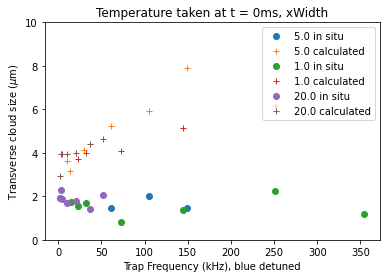

In [61]:
compz = 7.72
ODT3_Comp_final = 5

plt.figure()
for latticeDetuning in df_inSitu['latticeDetuning_GHz'].unique():
    df_temp = getSubDF(results, ['latticeDetuning_GHz', 'ODT3_Comp_final', 'compz'], [latticeDetuning, ODT3_Comp_final, compz]).groupby(['latticeDepth_mW']).mean().reset_index()    
    plt.plot(df_temp['trapFrequencyZ_kHz'], df_temp['xWidth_inSitu_v_um'], 'o', label = str(latticeDetuning) + ' in situ' )
    df_temp1 = getSubDF(df, ['latticeDetuning_GHz', 'BECHoldTime'], [latticeDetuning, 30]).groupby(['latticeDepth_mW']).mean().reset_index()
    df_temp2 = getSubDF(df_temperature, ['latticeDetuning_GHz', 'compz', 'BECHoldTime'], [latticeDetuning, compz, 30]).sort_values('latticeDepth_mW')
    #plt.plot(df_temp1['trapFrequencyZ_kHz'], np.sqrt(k_B*df_temp2['temperature_nK']*nK/(m*df_temp1['trapFrequencyX_Hz']**2))/(10**(-6)), '+', label = str(latticeDetuning) + ' calculated')
    plt.plot(df_temp['trapFrequencyZ_kHz'], np.sqrt(k_B*df_temp['temperature_nK']*nK/(m*(df_temp['trapFrequencyX_Hz']*Hz)**2))/um, '+', label = str(latticeDetuning) + ' calculated')
plt.legend()
plt.title('Temperature taken at t = 0ms, xWidth')
plt.ylabel('Transverse cloud size ($\mu$m)')
plt.xlabel('Trap Frequency (kHz), blue detuned')
plt.ylim(0,10)
plt.show()

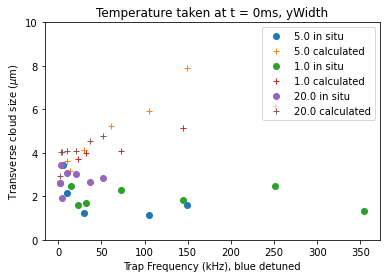

In [62]:
compz = 7.72
ODT3_Comp_final = 5

plt.figure()
for latticeDetuning in df_inSitu['latticeDetuning_GHz'].unique():
    df_temp = getSubDF(results, ['latticeDetuning_GHz', 'ODT3_Comp_final', 'compz'], [latticeDetuning, ODT3_Comp_final, compz]).groupby(['latticeDepth_mW']).mean().reset_index()    
    plt.plot(df_temp['trapFrequencyZ_kHz'], df_temp['yWidth_inSitu_v_um'], 'o', label = str(latticeDetuning) + ' in situ' )
    df_temp1 = getSubDF(df, ['latticeDetuning_GHz', 'BECHoldTime'], [latticeDetuning, 30]).groupby(['latticeDepth_mW']).mean().reset_index()
    df_temp2 = getSubDF(df_temperature, ['latticeDetuning_GHz', 'compz', 'BECHoldTime'], [latticeDetuning, compz, 30]).sort_values('latticeDepth_mW')
    #plt.plot(df_temp1['trapFrequencyZ_kHz'], np.sqrt(k_B*df_temp2['temperature_nK']*nK/(m*df_temp1['trapFrequencyX_Hz']**2))/(10**(-6)), '+', label = str(latticeDetuning) + ' calculated')
    plt.plot(df_temp['trapFrequencyZ_kHz'], np.sqrt(k_B*df_temp['temperature_nK']*nK/(m*(df_temp['trapFrequencyY_Hz']*Hz)**2))/um, '+', label = str(latticeDetuning) + ' calculated')
plt.legend()
plt.title('Temperature taken at t = 0ms, yWidth')
plt.ylabel('Transverse cloud size ($\mu$m)')
plt.xlabel('Trap Frequency (kHz), blue detuned')
plt.ylim(0,10)
plt.show()

In [63]:
getSubDF(results, ['latticeDetuning_GHz', 'latticeDepth_mW'], [1, 0.2])[['ODTFactor', 'trapFrequencyX_Hz', 'trapFrequencyY_Hz']]

,ODTFactor,trapFrequencyX_Hz,trapFrequencyY_Hz
0,0.0,NaN,NaN
1,0.0,NaN,NaN


In [64]:
results.iloc[:20,:10]

,N0,alpha,gamma,b,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,nCount
0,14990.583887,NaN,3.926718e-10,NaN,3.0,0.2,1.0,7.4,5.0,10074.909091
1,18188.356588,NaN,1.762904e-10,NaN,3.0,0.5,1.0,7.4,5.0,12116.259259
2,21865.355664,NaN,6.561539e-11,NaN,3.0,1.0,1.0,7.4,5.0,14711.545455
3,24345.344863,NaN,1.055649e-11,NaN,3.0,5.0,1.0,7.4,5.0,19266.100000
4,25541.191441,NaN,7.084229e-12,NaN,3.0,20.0,1.0,7.4,5.0,21020.875000
5,28860.438493,NaN,9.542568e-12,NaN,3.0,60.0,1.0,7.4,5.0,22112.600000
6,30298.257820,NaN,1.476252e-11,NaN,3.0,120.0,1.0,7.4,5.0,21684.077922
7,11090.340418,NaN,5.469727e-10,NaN,3.0,0.2,5.0,7.4,5.0,7613.000000
8,13526.585247,NaN,7.837649e-10,NaN,3.0,0.5,5.0,7.4,5.0,8510.650000
9,12658.599872,NaN,8.022831e-10,NaN,3.0,1.0,5.0,7.4,5.0,8016.333333


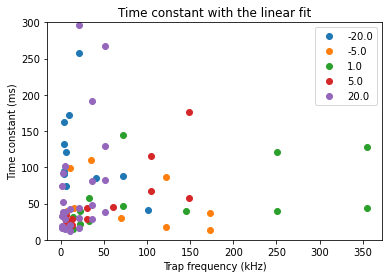

In [65]:
# Plot of the time constant
plt.figure()
for latticeDetuning in latticeDetuningList:
    results_temp = getSubDF(resultsDF_lin, ['latticeDetuning_GHz'], [latticeDetuning])
    plt.plot(results_temp['trapFrequencyZ_kHz'], results_temp['N0']/results_temp['b'], 'o', label = latticeDetuning)
plt.legend()
plt.title('Time constant with the linear fit')
plt.xlabel('Trap frequency (kHz)')
plt.ylabel('Time constant (ms)')
plt.ylim(0,300)
plt.show()

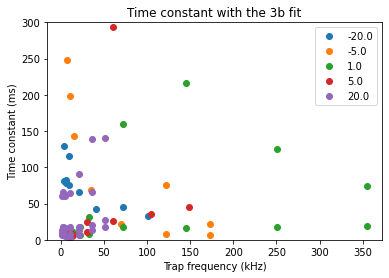

In [66]:
# Plot of the time constant
plt.figure()
for latticeDetuning in latticeDetuningList:
    results_temp = getSubDF(resultsDF_pure, ['latticeDetuning_GHz'], [latticeDetuning])
    plt.plot(results_temp['trapFrequencyZ_kHz'], 1/(results_temp['N0']**2*results_temp['gamma']), 'o', label = latticeDetuning)
plt.legend()
plt.title('Time constant with the 3b fit')
plt.xlabel('Trap frequency (kHz)')
plt.ylabel('Time constant (ms)')
plt.ylim(0,300)
plt.show()

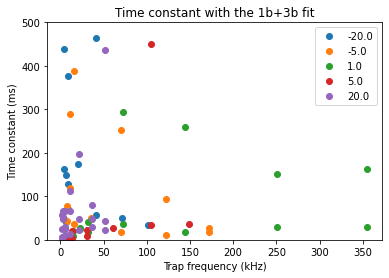

In [67]:
# Plot of the time constant
plt.figure()
for latticeDetuning in latticeDetuningList:
    results_temp = getSubDF(resultsDF_mix, ['latticeDetuning_GHz'], [latticeDetuning])
    plt.plot(results_temp['trapFrequencyZ_kHz'], 1/(results_temp['N0']**2*results_temp['gamma']), 'o', label = latticeDetuning)
plt.legend()
plt.title('Time constant with the 1b+3b fit')
plt.xlabel('Trap frequency (kHz)')
plt.ylabel('Time constant (ms)')
plt.ylim(0,500)
plt.show()

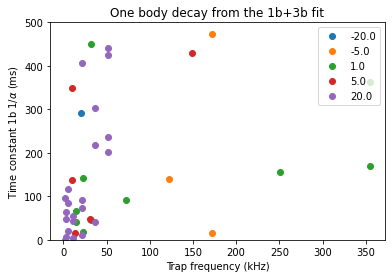

In [68]:
# Plot of the time constant
plt.figure()
for latticeDetuning in latticeDetuningList:
    results_temp = getSubDF(resultsDF_mix, ['latticeDetuning_GHz'], [latticeDetuning])
    plt.plot(results_temp['trapFrequencyZ_kHz'], 1/results_temp['alpha'], 'o', label = latticeDetuning)
plt.legend()
plt.title('One body decay from the 1b+3b fit')
plt.xlabel('Trap frequency (kHz)')
plt.ylabel(r'Time constant 1b $1/\alpha$ (ms)')
plt.ylim(0,500)
plt.show()

Adiabatic criterion. What is the real one?

Blue case: the smallest radial trap frequencies are about 200Hz with ODT3Comp = 5. Which means about 0.5ms should be fine and still adiabatic for the $z$ direction (starts at 3kHz). This trap frequency remains in the vicinity and might diminish to ~100Hz. It's best to be too fast than too slow in order not to change the temperature measurement.

Red case: smallest depends on the ODTFactor, but taking -20GHz and 0.2mW with ODTFactor = 4 we have 140Hz in X and 60Hz in Y. Agains starting at 0.5ms sounds good. -1GHz 120mW will be closer to 2kHz trap frequency while the Z is 300kHz, so 10 $\mu$s is good there.

A good formula would be $500\mu$s constant in the blue case and then noticing that $100$mW and -2GHz gives about 240kHz trap frequency, which is suitable for 10$\mu$s ramping time, then something that goes inversly propotionnal to $\sqrt{\frac{P/100}{\Delta/2}}$ is good. You want to saturate at 500$\mu$s at 0 power so:
\[\tau = max\left(\frac{10 \mu s}{\frac{10}{500} + \sqrt{\frac{P/100}{\Delta/2}}}, 10\mu s\right)\]

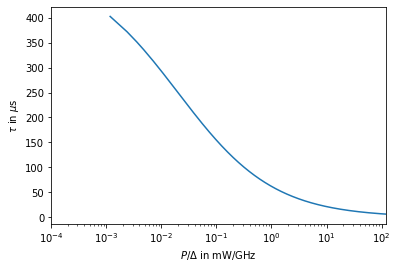

In [20]:
X = np.linspace(0.1/85, 120, 100000)   # X = P/Delta
Y = 10/(10/500+np.sqrt(X/50))
plt.figure()
plt.semilogx(X, Y)
plt.ylabel(r'$\tau$ in $\mu$s')
plt.xlabel(r'$P/\Delta$ in mW/GHz')
plt.xlim(0.0001, 120)
plt.show()

### End

Now let's look at the TOF series

In [70]:
df_TOF
latticeDepthList_TOF = df_TOF['latticeDepth'].unique()

plt.figure()
for latticeDepth in latticeDepthList_TOF[-1:]:
    df_run = getRun(df_TOF, latticeDepth, False, -5)
    plt.plot(df_run['TOF'], df_run['xWidth'], '*', label = 'Z')
    plt.plot(df_run['TOF'], df_run['yWidth'], '+', label = 'trans')
    
plt.xlabel("TOF")
plt.ylabel("Width")
plt.legend()
plt.show()

KeyError: 'latticeDepth'

In [ ]:
def sigma(t, sigma0, v):
    return np.sqrt(sigma0**2+(v*t)**2)

def fitRun_sigma(df_run, XorY = 'xWidth'):
    sigma0_guess = df_run[XorY].min()
    v_guess = df_run[XorY].max()/df_run['TOF'].max()
    popt, pcov = curve_fit(sigma, df_run['TOF'], df_run[XorY],
                       p0 = [sigma0_guess, v_guess]
                          )#bounds = ((0, 0), (np.inf, np.inf)),
                           #method = 'trf'
                      #)
    return popt, pcov

results_sigma = []
for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_run = getRun(df_TOF, latticeDepth, Y_rotation = False, latticeDetuning = latticeDetuning)
        #print(latticeDetuning, latticeDepth)
        if not df_run.empty:
            print(latticeDepth)
            popt_Z, pcov_Z = fitRun_sigma(df_run, 'xWidth')
            print('xRun ok')
            popt_trans, pcov_trans = fitRun_sigma(df_run, 'yWidth')
            print('yRun ok')
            results_sigma += [{'latticeDetuning' : latticeDetuning,
                             'latticeDepth' : latticeDepth,
                             'Y_rotation' : False,
                            'sigma0_Z' : popt_Z[0],
                            'v_Z' : popt_Z[1],
                            'sigma0_trans' : popt_trans[0],
                            'v_trans' : popt_trans[1],
                        }]
resultsDF_sigma = pd.DataFrame(results_sigma)

In [ ]:
resultsDF_sigma

In [ ]:
latticeDetuning = -5
latticeDepth = 0.1

tof = np.linspace(0, 8, 100)
df_run = getRun(df_TOF, latticeDepth, False, latticeDetuning)
df_res = getResult(resultsDF_sigma, latticeDepth, False, latticeDetuning)
sigma0_Z, v_Z, sigma0_trans, v_trans = df_res.iloc[0,3:7]
#sigma0_Z, v_Z = 8, 4
sigma_Z_fit = sigma(tof, sigma0_Z, v_Z)
sigma_trans_fit = sigma(tof, sigma0_trans, v_trans)

plt.figure()
plt.plot(tof, sigma_Z_fit, 'r-')
plt.plot(tof, sigma_trans_fit, 'b-')
plt.plot(df_run['TOF'], df_run['xWidth'], 'r*')
plt.plot(df_run['TOF'], df_run['yWidth'], 'b*')
#plt.ylim(0,2*max(sigma_Z_fit))
plt.show()

In [ ]:
df_TOF[df_TOF["latticeDepth"] == 0.1]

In [ ]:
plt.figure()
plt.plot(resultsDF_sigma['latticeDepth'], resultsDF_sigma['v_Z'], 'r*', label = 'Z')
plt.plot(resultsDF_sigma['latticeDepth'], resultsDF_sigma['v_trans'], 'b*', label = 'trans')
plt.legend()
#plt.ylim(0, 5)
plt.ylabel("velocity")
plt.xlabel("Lattice depth")
plt.show()


# add velocity scale = hbar*k // recoil temperature

Calculate the velocity to temperature conversion. Here $\sigma = \sqrt{\sigma_0^{2}+(\sigma_{v}t)^{2}}$ is fitted from a gaussian distribution $\exp(-\frac{1}{2}\frac{x^{2}}{\sigma^{2}})$ where $x = vt$, so $v$ is distributed like a gaussian with width $\sigma_{v}$ which is the result of the fit $P(v) \sim \exp(-\frac{1}{2}\frac{v^{2}}{\sigma_{v}^{2}}) \sim \exp(-\frac{\frac{1}{2}mv^{2}}{k_{B}T})$. Therefore we find:
\[ \sigma_{v} = \sqrt{\frac{k_{B}T}{m}}\]

In [ ]:
m_Dy = 164*1.66*10**(-27)
k_B = 1.38*10**(-23)
pixel_size = 3.45*10**(-6)
tof_unit = 10**(-3)
magnification = 3
resultsDF_sigma['temperature_Z'] = m_Dy*(resultsDF_sigma['v_Z']*pixel_size/magnification/tof_unit)**2/k_B
resultsDF_sigma['temperature_trans'] = m_Dy*(resultsDF_sigma['v_trans']*pixel_size/magnification/tof_unit)**2/k_B
resultsDF_sigma